In [1]:
using Turing, StatsPlots, Random
# using Distributions:Normal

In [2]:
# Define a simple Normal model with unknown mean and variance.
@model function gdemo(x, y)
  s² ~ InverseGamma(2, 3)
  m ~ Normal(0, sqrt(s²))
  x ~ Normal(m, sqrt(s²))
  y ~ Normal(m, sqrt(s²))
end

#  Run sampler, collect results
chn = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

# Summarise results
describe(chn)

2-element Vector{ChainDataFrame}:
 Summary Statistics (2 x 8)
 Quantiles (2 x 6)

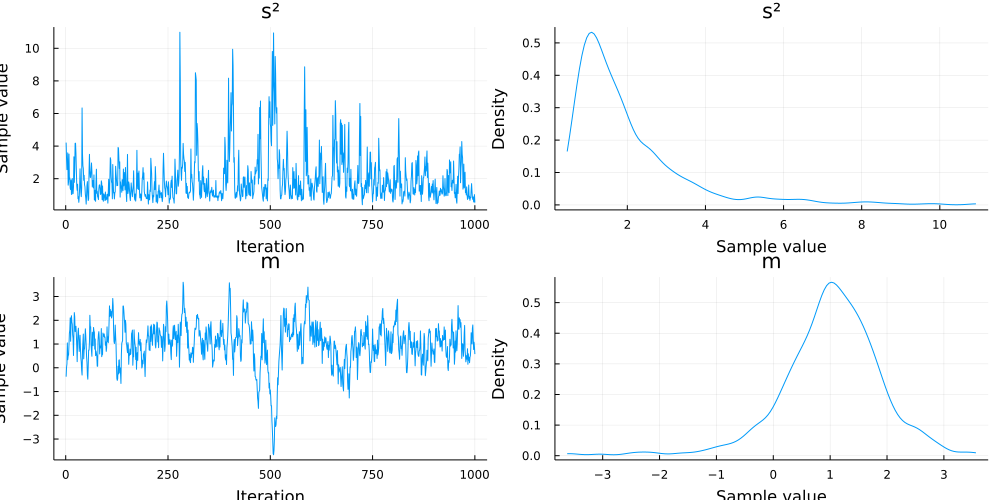

In [3]:
# Plot and save results
p = plot(chn)

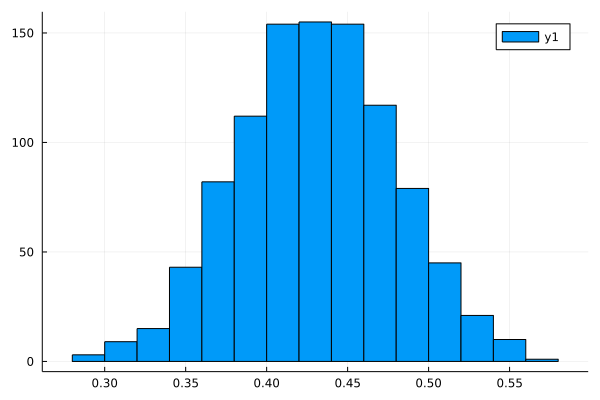

In [4]:

# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Declare our Turing model.
@model function coinflip(y)
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations)

# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])

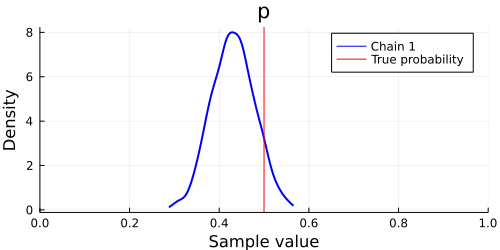

In [5]:


# Visualize a blue density plot of the approximate posterior distribution using HMC (see Chain 1 in the legend).
density(chain; xlim=(0, 1), legend=:best, w=2, c=:blue)

# # Visualize a green density plot of the posterior distribution in closed-form.
# plot!(
#     0:0.01:1,
#     pdf.(updated_belief(prior_belief, data), 0:0.01:1);
#     xlabel="probability of heads",
#     ylabel="",
#     title="",
#     xlim=(0, 1),
#     label="Closed-form",
#     fill=0,
#     α=0.3,
#     w=3,
#     c=:lightgreen,
# )

# Visualize the true probability of heads in red.
vline!([p_true]; label="True probability", c=:red)

In [6]:
d = Truncated(Normal(40,20), 0, 1000) # Truncated Normal
demand = round.(rand(d, 15));

In [7]:
demand_seen = demand[1:5]; demand_unseen = demand[6:15];
demand_seen

5-element Vector{Float64}:
 55.0
 56.0
 42.0
 56.0
 59.0

Let's use Bayesian Stats

$$
\begin{aligned}
\sigma & \sim HalfStudentT(10, 20) \\
\mu & \sim \mathcal{N}(\bar{x}, 20) \\
Demand & \sim TruncatedNormal(\mu, \sigma, 0)\\
\end{aligned}
$$

In [57]:
@model function newspaper(demand)
    σ ~ 10 + Truncated(TDist(20), 0, 100)
    μ ~ Normal(mean(demand_seen), 20)
    for i in 1:length(demand)
        demand[i] ~ Truncated(Normal(μ, σ), 0, 100)
    end
    return demand
end

newspaper (generic function with 4 methods)

In [48]:
idata = sample(newspaper(demand_seen), NUTS(), 10000)

┌ Info: Found initial step size
│   ϵ = 1.6
└ @ Turing.Inference /Users/nelsontang/.julia/packages/Turing/0KpGp/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/nelsontang/.julia/packages/AdvancedHMC/51xgc/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/nelsontang/.julia/packages/AdvancedHMC/51xgc/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/nelsontang/.julia/packages/AdvancedHMC/51xgc/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/nelsontang/.julia/packages

Chains MCMC chain (10000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:11000
Number of chains  = 1
Samples per chain = 10000
Wall duration     = 1.31 seconds
Compute duration  = 1.31 seconds
parameters        = σ, μ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           σ   10.7407    0.5890     0.0059    0.0067   5980.1285    0.9999    ⋯
           μ   53.5572    4.6688     0.0467    0.0646   4640.8277    0.9999    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

       

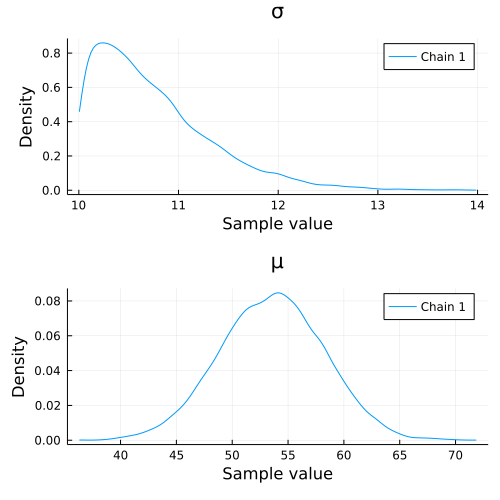

In [49]:
density(idata, legend=:best)